* Student Name: Varun Aggarwal
* ECE 595 Machine Learning II
* Project 2: Autoencoders - Student Code

In [1]:
#Import necessary packages
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


#Part 0: Importing and Normalizing Data

In [2]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

#Part 1: Deep Fully-Connected AutoEncoder

Answer the following questions: 


1.  We want to predict output values of the intensity of the pixels which are between 0 to 1. Therefore choice of output layer activation function is important. (Open ended reasoning question). (a) Choose 'softmax’ or ‘sigmoid’. Reason why one is preferred over the other.
 

2.   remove later 

  ANS: When

In [5]:
#Reshape training and testing data into 784-dimensional vectors
#FILL IN THIS CODE BLOCK
data_train_part1 = data_train.reshape(-1,784)
data_test_part1 = data_test.reshape(-1,784)

In [6]:
#Create autoencoder architecture
def deep_ae(act='sigmoid'):
    model = Sequential()
    
    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    # Encoder
    model.add(Dense(400, input_dim=784, name="input"))
    model.add(Dense(200))
    
    # Bottleneck
    model.add(Dense(100, name='bottleneck'))
    
    # Decoder
    model.add(Dense(200))
    model.add(Dense(400))
    model.add(Dense(784, activation=act))
    
    return model

#Create deep autoencoder graph
deep_ae_sig_mse = deep_ae()
deep_ae_sig_bce = deep_ae()
deep_ae_lin_mse = deep_ae('linear')
deep_ae_lin_bce = deep_ae('linear')

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
deep_ae_sig_mse.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
deep_ae_sig_bce.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
deep_ae_lin_mse.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
deep_ae_lin_bce.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
hist_sig_mse = deep_ae_sig_mse.fit(data_train_part1, data_train_part1, validation_data=(data_test_part1, data_test_part1), shuffle=True, epochs=150, batch_size=1024, verbose=0) 
print('Done Training Sigmoid MSE ')
hist_sig_bce = deep_ae_sig_bce.fit(data_train_part1, data_train_part1, validation_data=(data_test_part1, data_test_part1), shuffle=True, epochs=150, batch_size=1024, verbose=0) 
print('Done Training Sigmoid BCE ')
hist_lin_mse = deep_ae_lin_mse.fit(data_train_part1, data_train_part1, validation_data=(data_test_part1, data_test_part1), shuffle=True, epochs=150, batch_size=1024, verbose=0) 
print('Done Training Linear MSE ')
hist_lin_bce = deep_ae_lin_bce.fit(data_train_part1, data_train_part1, validation_data=(data_test_part1, data_test_part1), shuffle=True, epochs=150, batch_size=1024, verbose=0) 
print('Done Training Linear BCE ')

Done Training Sigmoid MSE 
Done Training Sigmoid BCE 
Done Training Linear MSE 
Done Training Linear BCE 


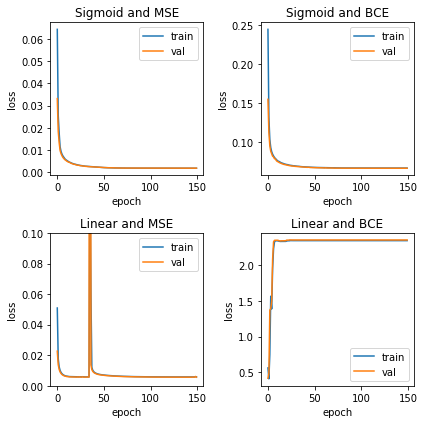

In [36]:
#Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

# Plot loss vs epoch for all combinations of output activation and loss functions
fig =  plt.figure(figsize=(6, 6))

# plot Sigmoid and MSE
ax = fig.add_subplot(2,2,1)
ax.plot(hist_sig_mse.history['loss'])
ax.plot(hist_sig_mse.history['val_loss'])
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train','val'])
ax.set_title('Sigmoid and MSE')

# plot Sigmoid and BCE
ax = fig.add_subplot(2,2,2)
ax.plot(hist_sig_bce.history['loss'])
ax.plot(hist_sig_bce.history['val_loss'])
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train','val'])
ax.set_title('Sigmoid and BCE')

# plot Sigmoid and MSE
ax = fig.add_subplot(2,2,3)
ax.plot(hist_lin_mse.history['loss'])
ax.plot(hist_lin_mse.history['val_loss'])
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.set_ylim([0,0.1])
ax.legend(['train','val'])
ax.set_title('Linear and MSE')

# plot Sigmoid and BCE
ax = fig.add_subplot(2,2,4)
ax.plot(hist_lin_bce.history['loss'])
ax.plot(hist_lin_bce.history['val_loss'])
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train','val'])
ax.set_title('Linear and BCE')

fig.tight_layout()

In [127]:
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
#FILL THIS IN
predicted_data_sig_mse = deep_ae_sig_mse.predict(data_test_part1)
predicted_data_sig_bce = deep_ae_sig_bce.predict(data_test_part1)
predicted_data_lin_mse = deep_ae_lin_mse.predict(data_test_part1)
predicted_data_lin_bce = deep_ae_lin_bce.predict(data_test_part1)

#Obtain encoder representation of data
new_model = K.function([deep_ae_sig_mse.get_layer('input').input], [deep_ae_sig_mse.get_layer('bottleneck').output])
encoder_rep = new_model([data_test_part1])[0]

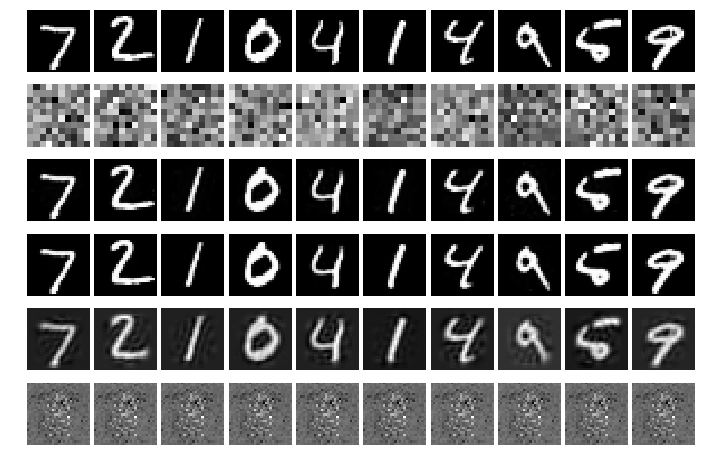

In [129]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES
fig = plt.figure(figsize=(12,8))
gs = plt.GridSpec(6, 10, wspace=0.05) 

for i in range(10):
    # plot training
    ax = fig.add_subplot(gs[0,i])
    ax.imshow(data_test_part1[i].reshape(-1, 28))
    ax.axis('off')
    
    # plot bottleneck
    ax = fig.add_subplot(gs[1,i])
    ax.imshow(encoder_rep[i].reshape(-1, 10))
    ax.axis('off')
    
    # plot output
    ax = fig.add_subplot(gs[2,i])
    ax.imshow(predicted_data_sig_mse[i].reshape(-1, 28))
    ax.axis('off')
    
    # plot output
    ax = fig.add_subplot(gs[3,i])
    ax.imshow(predicted_data_sig_bce[i].reshape(-1, 28))
    ax.axis('off')
    
    # plot output
    ax = fig.add_subplot(gs[4,i])
    ax.imshow(predicted_data_lin_mse[i].reshape(-1, 28))
    ax.axis('off')
    
    # plot output
    ax = fig.add_subplot(gs[5,i])
    ax.imshow(predicted_data_lin_bce[i].reshape(-1, 28))
    ax.axis('off')

Answer the following questions: 


1.  Question 2c: BONUS [reasoning question]: Pair the output layer activation and loss function which performs better together. Linear, sigmoid, Binary cross entropy and Mean Square error
 

2.  Question 5: Which loss function is better and why?

3.  Question 6: If we were to predict pixels values [0 to 255] directly at the output of last layer. Should there be an activation function in last later?  If yes, which activation function and why?,  If No, reason why?

# Part 2: Deep Convolutional AutoEncoder

In [130]:
#Reshape data into 2-D signals and account for grayscale channel in each image
#FILL IN THIS CODE BLOCK
data_train_part2 = data_train.reshape(-1,28,28,1)
data_test_part2 = data_test.reshape(-1,28,28,1)

In [163]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    
    # encoder
    model.add(Conv2D(16, (3, 3), input_shape=(28, 28,1), padding='same', name='input'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(8, (3, 3), padding='same'))
    
    # bottleneck
    model.add(MaxPooling2D((2, 2), padding='same', name='bottleneck'))
    
    # decoder
    model.add(Conv2D(8, (3, 3), padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(16, (3, 3), padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1, (3, 3), padding='same'))
              
    return model

#Create deep autoencoder graph
conv_ae_mse = cae()
conv_ae_bce = cae()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
conv_ae_mse.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
conv_ae_bce.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
hist_conv_mse = conv_ae_mse.fit(data_train_part2, data_train_part2, validation_data=(data_test_part2, data_test_part2), shuffle=True, epochs=150, batch_size=1024, verbose=0) 
print('Done Training MSE')
hist_conv_bce = conv_ae_bce.fit(data_train_part2, data_train_part2, validation_data=(data_test_part2, data_test_part2), shuffle=True, epochs=150, batch_size=1024, verbose=0) 
print('Done Training BCE') 

Done Training MSE
Done Training BCE


In [288]:
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
#FILL THIS IN
predicted_data_mse = conv_ae_mse.predict(data_test_part2)
predicted_data_bce = conv_ae_bce.predict(data_test_part2)

#Obtain encoder representation of data
get_hl = K.function([conv_ae_mse.layers[0].input], [conv_ae_mse.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl = get_hl([data_test_part2])[0]

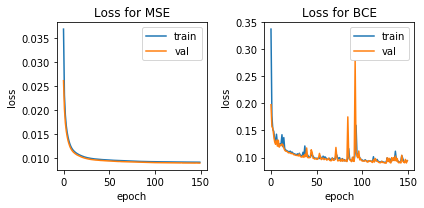

In [289]:
#Plot loss vs epoch  for BCE and MSE [Together or separate, Both accepted]
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

# Plot loss vs epoch for all combinations of output activation and loss functions
fig =  plt.figure(figsize=(6,3))

# plot Sigmoid and MSE
ax = fig.add_subplot(1,2,1)
ax.plot(hist_conv_mse.history['loss'])
ax.plot(hist_conv_mse.history['val_loss'])
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train','val'])
ax.set_title('Loss for MSE')

# plot Sigmoid and BCE
ax = fig.add_subplot(1,2,2)
ax.plot(hist_conv_bce.history['loss'])
ax.plot(hist_conv_bce.history['val_loss'])
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train','val'])
ax.set_title('Loss for BCE')

fig.tight_layout()

Text(0.5,1,u'Reconstruction BCE')

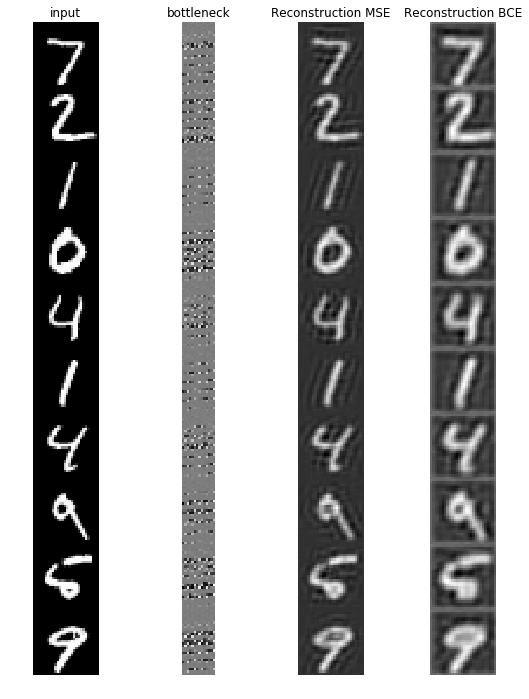

In [293]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES

fig = plt.figure(figsize=(6,12))
fig.subplots_adjust(right=1.3)

# input
ax = fig.add_subplot(1,4,1)
ax.imshow(data_test_part2[0:10].reshape(-1,28))
ax.axis('off')
ax.set_title('input')

# bottleneck
ax = fig.add_subplot(1,4,2)
ax.imshow(conv_ae_hl[0:10].reshape(-1, 14))
ax.axis('off')
ax.set_title('bottleneck')

# reconstruction MSE
ax = fig.add_subplot(1,4,3)
ax.imshow(predicted_data_mse[0:10].reshape(-1,28))
ax.axis('off')
ax.set_title('Reconstruction MSE')

# reconstruction BCE
ax = fig.add_subplot(1,4,4)
ax.imshow(predicted_data_bce[0:10].reshape(-1,28))
ax.axis('off')
ax.set_title('Reconstruction BCE')

Answer the following questions: 


1.  Question 4: Which loss function is better and why?

#Part 3: Denoising AutoEncoder

In [321]:
#Inject noise into testing data
noise_factor = 0.25
data_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)

#Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

#Reshape data to comply with input of denoising autoencoder
#FILL THIS IN
data_train_noisy_part3 = data_train_noisy.reshape(-1,784)
data_test_noisy_part3 = data_test_noisy.reshape(-1,784)

Text(0.5,1,u'Noisy Train Data')

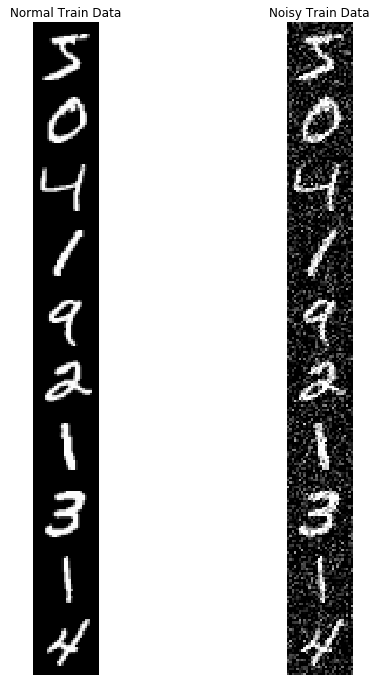

In [322]:
#Show samples of 10 original images and their corrsponding noisy counterparts from the training set
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES
fig = plt.figure(figsize=(6,12))
fig.subplots_adjust(right=1.2)

# input
ax = fig.add_subplot(1,2,1)
ax.imshow(data_train[0:10].reshape(-1,28))
ax.axis('off')
ax.set_title('Normal Train Data')

# noisy
ax = fig.add_subplot(1,2,2)
ax.imshow(data_train_noisy_part3[0:10].reshape(-1, 28))
ax.axis('off')
ax.set_title('Noisy Train Data')

In [323]:
#Create denoising autoencoder architecture
def dae(act='sigmoid'):
    
    model = Sequential()
    
    #FILL THIS IN WITH MODEL ARCHITECTURE
    # Encoder
    model.add(Dense(400, input_dim=784, name="input"))
    model.add(Dense(200))
    
    # Bottleneck
    model.add(Dense(100, name='bottleneck'))
    
    # Decoder
    model.add(Dense(200))
    model.add(Dense(400))
    model.add(Dense(784, activation=act))
    
    return model
  
#Compile and train the DAE
#FILL THIS IN
dae = dae()
dae.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
hist_dae = dae.fit(data_train_noisy_part3, data_train_part1, validation_data=(data_test_noisy_part3, data_test_part1), shuffle=True, epochs=150, batch_size=1024, verbose=0) 
print('Done Training')

Done Training


In [324]:
#Generate denoised versions of noisy inputs
#FILL THIS IN
predicted_dae = dae.predict(data_test_noisy_part3)

Text(0.5,1,u'Loss vs epoch (denoising)')

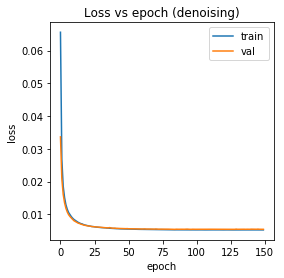

In [325]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

# Plot loss vs epoch for all combinations of output activation and loss functions
fig =  plt.figure(figsize=(4,4))

# plot Sigmoid and MSE
ax = fig.add_subplot(1,1,1)
ax.plot(hist_dae.history['loss'])
ax.plot(hist_dae.history['val_loss'])
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train','val'])
ax.set_title('Loss vs epoch (denoising)')

Text(0.5,1,u'Noisy Train Data')

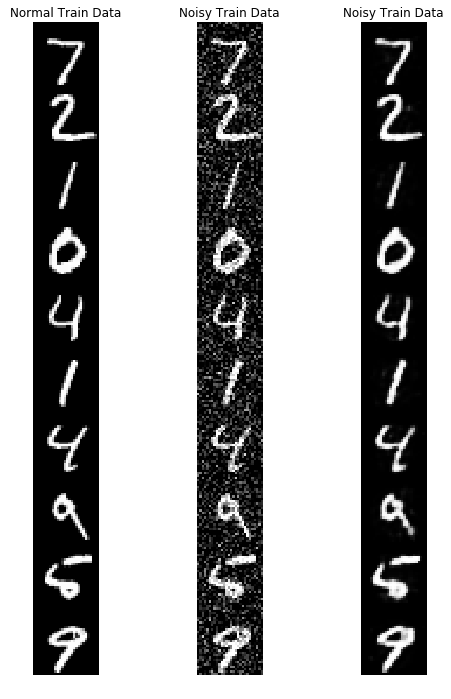

In [328]:
#Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set
#FILL THIS CODE BLOCK IN AND PRODUCE SAMPLES
fig = plt.figure(figsize=(6,12))
fig.subplots_adjust(right=1.2)

# input
ax = fig.add_subplot(1,3,1)
ax.imshow(data_test_part1[0:10].reshape(-1,28))
ax.axis('off')
ax.set_title('Normal Train Data')

# noisy
ax = fig.add_subplot(1,3,2)
ax.imshow(data_test_noisy_part3[0:10].reshape(-1, 28))
ax.axis('off')
ax.set_title('Noisy Train Data')

# denoised
ax = fig.add_subplot(1,3,3)
ax.imshow(predicted_dae[0:10].reshape(-1, 28))
ax.axis('off')
ax.set_title('Noisy Train Data')